In [6]:
import sklearn
#scikit-learn 0.24.2
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.


In [ ]:
conda update conda

In [ ]:
!pip install wordcloud

In [17]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
stop_words = set(stopwords.words('english'))

In [18]:
df = pd.read_csv('train_news.csv')
df.head(25)

Unnamed: 0     id                                           headline  \
0            0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1            1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2            2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3            3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4            4   7596                       A Digital 9/11 If Trump Wins   
5            5   3196  Whatever the Outcome on November 8th the US Wi...   
6            6   5134  Rapid Evolution Saved This Fish From Pollution...   
7            7   1504  Alabama Prison Officials Retaliate Against Pri...   
8            8  13559                                                NaN   
9            9   4203           Can We Live in a Constant State of Love?   
10          10  11136  Is Hillary a Closet Drunk… New WikiLeak Email ...   
11          11   2150  BLOOMBERG-BACKED PENNSYLVANIA ATTORNEY GENERAL...   
12          12   7583      VIDEO: Le Pen Pelted With Eggs, Keeps Smiling   
13          13  10200  Donald Trump Is The Candidate For Americans, N...   
14          14  14017                                                NaN   
15          15  17406  Wharton Business School Backers Seek Distance ...   
16          16   6857  Brexit Ruling Just Latest Tactic to Block Will...   
17          17   4694  Millions of South Koreans Rise Up Against Shad...   
18          18   1074  Chelsea Manning Asks Obama to Cut Sentence to ...   
19          19  19716  Cities Vow to Fight Trump on Immigration, Even...   
20          20   5783  YouTube Livestream of Pregnant Giraffe Pulled ...   
21          21  11509  Meet CoverGirl’s New Cover Boy - The New York ...   
22          22   5272  ‘Gambia Is Back Again,’ but Its New Leader Is ...   
23          23  13343  Welcome to the Trump World Order      : Inform...   
24          24   8643                                                NaN   

                             written_by  \
0            Eric Lipton and Steve Eder   
1                       David Waldstein   
2                               Pam Key   
3                          Jess Bidgood   
4                     Finian Cunningham   
5                                   NaN   
6                          JoAnna Klein   
7                      Brian Sonenstein   
8                           steventexas   
9                               Gillian   
10                             V Saxena   
11                           Iron Sheik   
12                          Liam Deacon   
13                       Luke Stranahan   
14                              hubwolf   
15                           Steve Eder   
16                    Daniel Greenfield   
17                             Madeline   
18                       Charlie Savage   
19     Jennifer Medina and Jess Bidgood   
20                        Jack Hadfield   
21                   Valeriya Safronova   
22  Dionne Searcey and Jaime Yaya Barry   
23                     Maria Dubovikova   
24                           OZbanislam   

                                                 news  label  
0   WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1   HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2   Sunday on ABC’s “This Week,” while discussing ...      0  
3   AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4     Finian Cunningham has written extensively on...      1  
5   Taming the corporate media beast Whatever the ...      1  
6   The State of New Jersey says you can’t eat the...      0  
7   Advocates say prison officials at the Kilby Co...      1  
8   People have made up their minds on president.\...      1  
9   Leave a reply \nToni Emerson – When we fall in...      1  
10  BREAKING: Clinton Fixer Reveals Sick Smear Hil...      1  
11  Home › POLITICS | US NEWS › BLOOMBERG-BACKED P...      1  
12  Populist French presidential candidate Marine ...      0  
13    Donald Trump Is The 

In [19]:
df.shape

(20800, 6)

dataset is big we have 20800 rows and 6 columns

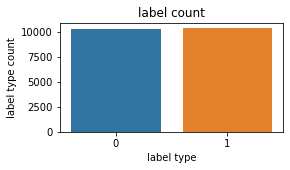

1    10413
0    10387
Name: label, dtype: int64


In [20]:
plt.subplots(figsize=(4,2))
sns.countplot(x='label',data=df)
plt.title('label count')
plt.xlabel('label type')
plt.ylabel('label type count')
plt.show()

print(df['label'].value_counts())

We observe that both label class are of almost equal size which makes it easy for us to do classification without class balancing

In [39]:
print(df['written_by'].value_counts())

Pam Key                                243
admin                                  193
Jerome Hudson                          166
Charlie Spiering                       141
John Hayward                           140
                                      ... 
Christopher Clarey and Karen Crouse      1
Rick Lyman and Joanna Berendt            1
Michael Barbaro and Noah Remnick         1
Ben Hubbard and Hwaida Saad              1
Dan Bilefsky and Henry Fountain          1
Name: written_by, Length: 4201, dtype: int64


In [29]:
print(df['written_by'][df['label']==1].value_counts())

admin                193
Pakalert              86
Eddy Lavine           85
Starkman              84
Alex Ansary           82
                    ... 
George Washington      1
Андрей Иванов          1
Paul Blake             1
Tyler Cole             1
John Helmer            1
Name: written_by, Length: 1981, dtype: int64


In [40]:
duplicate = df[df.duplicated()]

In [8]:
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [Unnamed: 0, id, headline, written_by, news, label]
Index: []


There are no duplicate rows in dataset

In [9]:
df['id'].unique().shape

(20800,)

In [10]:
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [11]:
import warnings
warnings.filterwarnings('ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


# Data Preprocessing and EDA

In [42]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
df['headline'] = imp_mean.fit_transform(df['headline'].values.reshape(-1,1))

In [43]:
df.drop(columns=['id','Unnamed: 0','written_by'], axis=1,inplace=True)

In [44]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [45]:
df.shape

(20761, 3)

In [46]:
df.head()

headline  \
0  Ethics Questions Dogged Agriculture Nominee as...   
1  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2  Cotton to House: ’Do Not Walk the Plank and Vo...   
3  Paul LePage, Besieged Maine Governor, Sends Co...   
4                       A Digital 9/11 If Trump Wins   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

In [47]:
#New column for Length of news_headline
df["length_headline"] = df["headline"].apply(len)
df.sort_values(by='length_headline', ascending=False).head(25)

headline  \
13812  Roger Stone update on Stop the Steal exit poll...   
16366  Scott Bennett, Whistleblower, U.S. Army Terror...   
8066   Life: If You Love Enamel Pins, You’ll Love Thi...   
1538   Comment on Understanding Misleading Food Label...   
6032   Our Landfill Economy: Want to make a quick pro...   
45     6-minute analysis: Will FBI agents break ‘Empe...   
1995   Veterans Day is typical .01% rogue state inver...   
19410  Comment on These Lifestyle Choices Lower Your ...   
17511  Dr. Jim Willie: ‘The Western central bank fran...   
17356  1-hour video: Bush-Clinton and .01% ‘Deep Stat...   
4274   Comment on 15 Plants & Herbs That Can Boost Lu...   
19584  Comment on Architecture is More Than a Clever ...   
3057   Comment on 10 Presidents & Politicians Who Tol...   
5500   Comment on BBC targets children to promote the...   
11309  Comment on 10 More Beautiful Images That Remin...   
12504  Comment on Invention Secrecy At All-Time High:...   
19853  Comment on The Science is “Overwhelming At Thi...   
7760   Comment on Russian Government Calls For Intern...   
3206   Always under fire from designated terrorist gr...   
7616   BREAKING! NYPD Ready To Make Arrests In Weiner...   
18472  Comment on Johnson & Johnson Ordered To Pay $7...   
3582   Comment on Breaking: CDC Blocks Testimony of T...   
7410   Secret Emails From Hillary Clinton Reveal: The...   
5599   Comment on Guess what happened in Chiraq this ...   
1898   Comment on ‘Voting Is Rigged & Used To Pacify ...   

                                                    news  label  \
13812  \nRoger Stone: Hillary Plans to Steal Election...      1   
16366  Exposing the I.S.I.S. Lie: How President Obama...      1   
8066   Email If you can’t get enough enamel pins, the...      1   
1538   Share on Facebook Share on Twitter “Let food b...      1   
6032   0 Our Landfill Economy: Want to make a quick p...      1   
45     hat tip: What Really Happened \nAlex Jones’ 6-...      1   
1995   This condition is only possible with criminall...      1   
19410  Share on Facebook Share on Twitter According t...      1   
17511  Dr. Jim Willie: ‘The Western central bank fran...      1   
17356  SGT Report interviews Ole Dammegard over 62 mi...      1   
4274   Share on Facebook Share on Twitter When it com...      1   
19584    In this Ted Talk , Michael Murphy discusses ...      1   
3057     “ The conscious and intelligent manipulation...      1   
5500   Posted on October 30, 2016 by DCG | 1 Comment ...      1   
11309  Share on Facebook Share on Twitter It seems so...      1   
12504  Share on Facebook Share on Twitter Government ...      1   
19853    This ordinance is a big step forwards by cre...      1   
7760   Share on Facebook Share on Twitter There are a...      1   
3206   BNI Store Oct 26 2016 Always under fire from d...      1   
7616   BREAKING! NYPD Ready To Make Arrests In Weiner...      1   
18472  advertisement - learn more \nThis is one out o...      1   
3582     Have you heard of Dr. William Thompson? If y...      1   
7410   Email \nReading through Hillary and her ‘gang’...      1   
5599   Posted on November 1, 2016 by DCG | 1 Comment ...      1   
1898   Share on Facebook Share on Twitter “This is th...      1   

       length_headline  
13812              456  
16366              396  
8066               289  
1538               277  
6032               276  
45                 262  
1995               255  
19410              251  
17511              250  
17356              247  
4274               241  
19584              239  
3057               239  
5500               231  
11309              231  
12504              229  
19853              229  
7760               225  
3206               223  
7616               223  
18472              222  
3582               221  
7410               218  
5599               215  
1898               214

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

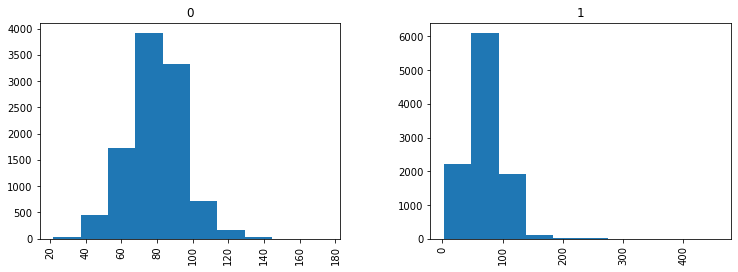

In [27]:
df.hist(column = 'length_headline', by ='label',figsize=(12,4), bins = 10)

From above dataframe and plots we observe that the length of headline for most of fake news is very large as compared with Not fake news.

In [48]:
#New column for Length of news
df["length"] = df["news"].apply(len)
df.sort_values(by='length', ascending=False).head(25)

headline  \
9874   Заседание Международного дискуссионного клуба ...   
9927   Re: The Hard Working American vs. The Governme...   
17346  Re: Why Are So Many People Choosing To Leave T...   
3735   Re: How Many People Will Have To Migrate Out O...   
16372  Re: It Is Now Mathematically Impossible To Pay...   
194    Re: 55 Reasons Why California Is The Worst Sta...   
2411   Re: Why Is Obama Threatening Russia With World...   
20414  Benny Morris’s Untenable Denial of the Ethnic ...   
2724       The Great A.I. Awakening - The New York Times   
5272   Full Transcript and Video: Trump News Conferen...   
1454   Comment on BREAKING: Officer Charged for Killi...   
10391  Re: Camden, New Jersey: One Of Hundreds Of U.S...   
1498    President Putin Asks US To Stop Provoking Russia   
7483   Re: More Americans Than Ever Are Losing Their ...   
10882  Donald Trump’s New York Times Interview: Full ...   
11364  Choosing a School for My Daughter in a Segrega...   
15634  Re: America Has Become A Lawless Nation – Hill...   
1330   **Livewire** President Trump’s First Address t...   
19452  John Kerry's Remarks at the Chicago Council on...   
4925   An open letter to Fareed Zakaria from The Peop...   
3610   Re: What Is The Best Place To Live In The Unit...   
17182  The Name of Rose, an Arkansas Thriller: Clinto...   
5163       How to Hide $400 Million - The New York Times   
10301  Comment on Police Admit Officers May Also Be R...   
5712   Neanderthals Were People, Too - The New York T...   

                                                    news  label  \
9874   Заседание Международного дискуссионного клуба ...      1   
9927   The Hard Working American vs. The Government P...      1   
17346  Why Are So Many People Choosing To Leave The U...      1   
3735   How Many People Will Have To Migrate Out Of Ca...      1   
16372  It Is Now Mathematically Impossible To Pay Off...      1   
194    55 Reasons Why California Is The Worst State I...      1   
2411   Why Is Obama Threatening Russia With World War...      1   
20414  References The Debate \nIt started when Daniel...      1   
2724   Late one Friday night in early November, Jun R...      0   
5272   President Trump on Thursday announced his new ...      0   
1454   Home / BREAKING NEWS / BREAKING: Officer Charg...      1   
10391    Camden, New Jersey: One Of Hundreds Of U.S. ...      1   
1498   Here is President Putin’s speech at Valdai Put...      1   
7483   More Americans Than Ever Are Losing Their Reli...      1   
10882  Following is a transcript of   Donald J. Trump...      0   
11364  In the spring of 2014, when our daughter, Najy...      0   
15634  America Has Become A Lawless Nation – Hillary ...      1   
1330   Welcome to the Breitbart News Livewire of Pres...      0   
19452  John Kerry’s Remarks at the Chicago Council on...      1   
4925   1/18/2016, 12:59 am Fareed Zakaria can dish it...      1   
3610   Are The Polls Rigged Against Trump? All Of The...      1   
17182  The New Republic Mon, 04 Apr 1994 13:56 UTC Yo...      1   
5163   A few weeks after she realized her husband was...      0   
10301  Home / Badge Abuse / Police Admit Officers May...      1   
5712   Joachim Neander was a   Calvinist theologian w...      0   

       length_headline  length  
9874                73  142961  
9927                57  134206  
17346               75  115372  
3735                89  115010  
16372               73   99355  
194                 59   98698  
2411                79   96869  
20414               68   92561  
2724                45   85948  
5272                69   75897  
1454               110   73679  
10391              104   73181  
1498                48   68208  
7483                54   65874  
10882               77   63384  
11364               75   57846  
15634               86   56795  
1330                75   55746  
19452               79   52821  
4925                55   52800  
3610               100   52289  
17182             

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

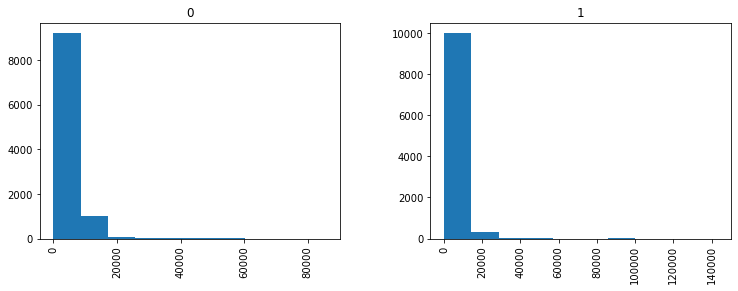

In [115]:
df.hist(column = 'length', by ='label',figsize=(12,4), bins = 10)

From above dataframe and plots we observe that the length of news columns values for most of fake news is very large as compared with Not fake news.

In [49]:
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

In [87]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [50]:
def cleaning_data(row):
    #taking only words and removing number and special chars using RegX
    row=row.lower()
    row=re.sub('[^a-zA-Z]',' ',row)
    #tokenize the data
    tokens = word_tokenize(row)
    #lemmatize rhe word and remove stop words
    news = [lemma.lemmatize(word,pos="v") for word in tokens if not word in stop_words]
    #finally join all the token with space 
    cleaned_news=' '.join(news)
    
    return cleaned_news

In [51]:
x=df['news']
y=df['label']

In [52]:
from nltk import ngrams

## Applying cleaning_data function on news text

In [53]:
df['news']=df['news'].apply(cleaning_data)

In [54]:
df['news']

0        washington sonny perdue tell georgians grow we...
1        houston venezuela plan tactical approach desig...
2        sunday abc week discuss republican plan repeal...
3        augusta beleaguer republican governor maine se...
4        finian cunningham write extensively internatio...
                               ...                        
20795                     dog lick vomit chinese overlords
20796    rixon stewart november rixon stewart nov migra...
20797    post eddie know dakota access pipeline protest...
20798    officially summer society boutique society mem...
20799    emory university atlanta georgia announce fund...
Name: news, Length: 20761, dtype: object

## Topic Modelling

In [56]:
!pip install gensim

  Using cached gensim-4.0.1-cp38-cp38-win_amd64.whl (23.9 MB)


In [57]:
import gensim

In [ ]:
df['index'] = df['news'].index

In [65]:
documents = df

In [66]:
print(len(documents))
print(documents[:5])

20761
                                            headline  \
0  Ethics Questions Dogged Agriculture Nominee as...   
1  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2  Cotton to House: ’Do Not Walk the Plank and Vo...   
3  Paul LePage, Besieged Maine Governor, Sends Co...   
4                       A Digital 9/11 If Trump Wins   

                                                news  label  length_headline  \
0  washington sonny perdue tell georgians grow we...      0               84   
1  houston venezuela plan tactical approach desig...      0               72   
2  sunday abc week discuss republican plan repeal...      0              100   
3  augusta beleaguer republican governor maine se...      0              100   
4  finian cunningham write extensively internatio...      1               28   

   length  index  
0    7936      0  
1    6112      1  
2     425      2  
3    6516      3  
4    9164      4  


In [83]:
from gensim.utils import simple_preprocess

Write a function to perform lemmatize and stem preprocessing steps on the data set.

In [84]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

Select a document to preview after preprocessing.

In [88]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Texas', 'State', 'Rep.', 'Claims', 'Death', 'Threats,', 'Assault', 'from', 'Fellow', 'House', 'Members']


 tokenized and lemmatized document: 
['texa', 'state', 'claim', 'death', 'threat', 'assault', 'fellow', 'hous', 'member']


Preprocess the headline text, saving the results as ‘processed_docs’

In [89]:
processed_docs = documents['headline'].map(preprocess)
processed_docs[:10]

0    [ethic, question, dog, agricultur, nomine, geo...
1    [deep, stop, argentina, lionel, messi, york, t...
2    [cotton, hous, walk, plank, vote, pass, senat,...
3    [paul, lepag, besieg, main, governor, send, co...
4                                  [digit, trump, win]
5    [outcom, novemb, collis, cours, china, federic...
6    [rapid, evolut, save, fish, pollut, studi, say...
7    [alabama, prison, offici, retali, prison, stri...
8    [readi, civil, unrest, survey, find, american,...
9                        [live, constant, state, love]
Name: headline, dtype: object

Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

In [90]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 agricultur
1 dog
2 ethic
3 georgia
4 governor
5 nomine
6 question
7 time
8 york
9 argentina
10 deep


In [91]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

Gensim doc2bow

In [92]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(6, 1), (7, 1), (248, 1), (931, 1), (1141, 1), (1161, 1), (1604, 1)]

Preview Bag Of Words for our sample preprocessed document.

In [93]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 6 ("time") appears 1 time.
Word 7 ("york") appears 1 time.
Word 248 ("judg") appears 1 time.
Word 931 ("lock") appears 1 time.
Word 1141 ("rich") appears 1 time.
Word 1161 ("defend") appears 1 time.
Word 1604 ("request") appears 1 time.


TF-IDF

In [94]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.43396889509184766),
 (1, 0.42002562989517406),
 (2, 0.44791216028852116),
 (3, 0.3847016408643304),
 (4, 0.40863315270962963),
 (5, 0.32976118515628494),
 (6, 0.07293898266307647),
 (7, 0.07473436013555779)]


Running LDA using Bag of Words

In [95]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

For each topic, we will explore the words occuring in that topic and its relative weight.

In [96]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.050*"hillari" + 0.041*"clinton" + 0.035*"trump" + 0.025*"breitbart" + 0.012*"know" + 0.011*"campaign" + 0.010*"get" + 0.010*"email" + 0.010*"support" + 0.009*"video"
Topic: 1 
Words: 0.061*"trump" + 0.019*"breitbart" + 0.018*"donald" + 0.015*"border" + 0.013*"wall" + 0.012*"time" + 0.012*"stand" + 0.011*"york" + 0.009*"life" + 0.008*"video"
Topic: 2 
Words: 0.192*"time" + 0.189*"york" + 0.027*"trump" + 0.013*"donald" + 0.010*"brief" + 0.008*"say" + 0.006*"even" + 0.005*"die" + 0.005*"year" + 0.004*"north"
Topic: 3 
Words: 0.065*"breitbart" + 0.043*"trump" + 0.028*"state" + 0.019*"news" + 0.014*"hous" + 0.013*"fake" + 0.012*"white" + 0.009*"report" + 0.009*"voter" + 0.009*"vote"
Topic: 4 
Words: 0.038*"time" + 0.035*"york" + 0.016*"polic" + 0.014*"trump" + 0.012*"attack" + 0.012*"peopl" + 0.011*"comment" + 0.009*"pipelin" + 0.009*"power" + 0.008*"want"
Topic: 5 
Words: 0.032*"trump" + 0.018*"black" + 0.016*"come" + 0.014*"world" + 0.013*"time" + 0.011*"york" + 0.011*"

Running LDA using TF-IDF

In [97]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.035*"elect" + 0.034*"violenc" + 0.034*"readi" + 0.034*"civil" + 0.034*"survey" + 0.034*"unrest" + 0.034*"find" + 0.034*"concern" + 0.034*"american" + 0.010*"trump"
Topic: 1 Word: 0.017*"york" + 0.017*"trump" + 0.017*"time" + 0.008*"year" + 0.008*"donald" + 0.008*"breitbart" + 0.008*"clinton" + 0.007*"white" + 0.006*"hous" + 0.006*"hillari"
Topic: 2 Word: 0.019*"york" + 0.019*"time" + 0.015*"trump" + 0.010*"breitbart" + 0.007*"obamacar" + 0.007*"america" + 0.006*"donald" + 0.006*"world" + 0.006*"hillari" + 0.005*"putin"
Topic: 3 Word: 0.013*"time" + 0.013*"york" + 0.013*"breitbart" + 0.010*"trump" + 0.007*"russia" + 0.005*"israel" + 0.005*"life" + 0.005*"anti" + 0.005*"terror" + 0.005*"daili"
Topic: 4 Word: 0.015*"york" + 0.015*"time" + 0.014*"breitbart" + 0.013*"trump" + 0.012*"vote" + 0.007*"presid" + 0.006*"hillari" + 0.006*"watch" + 0.006*"say" + 0.006*"state"
Topic: 5 Word: 0.016*"clinton" + 0.016*"time" + 0.016*"york" + 0.011*"hillari" + 0.011*"trump" + 0.010*"ema

Performance evaluation by classifying sample document using LDA Bag of Words model

In [98]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.7431748509407043	 
Topic: 0.192*"time" + 0.189*"york" + 0.027*"trump" + 0.013*"donald" + 0.010*"brief" + 0.008*"say" + 0.006*"even" + 0.005*"die" + 0.005*"year" + 0.004*"north"

Score: 0.1566692441701889	 
Topic: 0.077*"time" + 0.071*"york" + 0.030*"clinton" + 0.024*"trump" + 0.018*"hillari" + 0.011*"polit" + 0.010*"obama" + 0.008*"rule" + 0.008*"court" + 0.007*"email"

Score: 0.012525051832199097	 
Topic: 0.050*"hillari" + 0.041*"clinton" + 0.035*"trump" + 0.025*"breitbart" + 0.012*"know" + 0.011*"campaign" + 0.010*"get" + 0.010*"email" + 0.010*"support" + 0.009*"video"

Score: 0.012521407566964626	 
Topic: 0.032*"trump" + 0.018*"black" + 0.016*"come" + 0.014*"world" + 0.013*"time" + 0.011*"york" + 0.011*"gold" + 0.011*"deal" + 0.011*"gener" + 0.010*"comment"

Score: 0.012521092779934406	 
Topic: 0.065*"breitbart" + 0.043*"trump" + 0.028*"state" + 0.019*"news" + 0.014*"hous" + 0.013*"fake" + 0.012*"white" + 0.009*"report" + 0.009*"voter" + 0.009*"vote"

Score: 0.012520942836

Performance evaluation by classifying sample document using LDA TF-IDF model.

In [100]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8874563574790955	 
Topic: 0.013*"time" + 0.013*"york" + 0.013*"breitbart" + 0.010*"trump" + 0.007*"russia" + 0.005*"israel" + 0.005*"life" + 0.005*"anti" + 0.005*"terror" + 0.005*"daili"

Score: 0.012507333420217037	 
Topic: 0.015*"elect" + 0.011*"trump" + 0.011*"time" + 0.011*"york" + 0.010*"world" + 0.010*"american" + 0.007*"clinton" + 0.007*"violenc" + 0.007*"hillari" + 0.007*"readi"

Score: 0.012505588121712208	 
Topic: 0.029*"time" + 0.029*"york" + 0.014*"trump" + 0.008*"news" + 0.008*"donald" + 0.008*"breitbart" + 0.008*"fake" + 0.006*"hillari" + 0.006*"russia" + 0.005*"clinton"

Score: 0.012505457736551762	 
Topic: 0.014*"york" + 0.013*"time" + 0.012*"trump" + 0.010*"breitbart" + 0.009*"clinton" + 0.009*"hillari" + 0.006*"die" + 0.006*"video" + 0.006*"illeg" + 0.006*"obama"

Score: 0.012504760175943375	 
Topic: 0.016*"clinton" + 0.016*"time" + 0.016*"york" + 0.011*"hillari" + 0.011*"trump" + 0.010*"email" + 0.008*"wikileak" + 0.007*"breitbart" + 0.007*"democrat" + 0.00

Testing model on unseen document

In [101]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.43707209825515747	 Topic: 0.032*"trump" + 0.018*"black" + 0.016*"come" + 0.014*"world" + 0.013*"time"
Score: 0.2856405973434448	 Topic: 0.061*"trump" + 0.019*"breitbart" + 0.018*"donald" + 0.015*"border" + 0.013*"wall"
Score: 0.1605711132287979	 Topic: 0.077*"time" + 0.071*"york" + 0.030*"clinton" + 0.024*"trump" + 0.018*"hillari"
Score: 0.01667560636997223	 Topic: 0.065*"breitbart" + 0.043*"trump" + 0.028*"state" + 0.019*"news" + 0.014*"hous"
Score: 0.01667478121817112	 Topic: 0.050*"hillari" + 0.041*"clinton" + 0.035*"trump" + 0.025*"breitbart" + 0.012*"know"
Score: 0.016674397513270378	 Topic: 0.192*"time" + 0.189*"york" + 0.027*"trump" + 0.013*"donald" + 0.010*"brief"
Score: 0.01667354442179203	 Topic: 0.046*"trump" + 0.043*"breitbart" + 0.025*"clinton" + 0.023*"hillari" + 0.019*"obama"
Score: 0.016673384234309196	 Topic: 0.038*"time" + 0.035*"york" + 0.016*"polic" + 0.014*"trump" + 0.012*"attack"
Score: 0.016672341153025627	 Topic: 0.049*"breitbart" + 0.034*"trump" + 0.01

## Applying cleaning_data function on headline text

In [22]:
df['headline']=df['headline'].apply(cleaning_data)

In [23]:
df['headline']

0        ethics question dog agriculture nominee georgi...
1        u must dig deep stop argentina lionel messi ne...
2        cotton house walk plank vote bill pass senate ...
3        paul lepage besiege maine governor send confli...
4                                        digital trump win
                               ...                        
20795    get ready civil unrest survey find americans c...
20796                  albert pike european migrant crisis
20797    dakota access catch infiltrate protest incite ...
20798                stretch summer solstice new york time
20799    emory university pay percent undocumented stud...
Name: headline, Length: 20761, dtype: object

In [27]:
df['clean_length'] = df['news'].str.len()

In [28]:
df['clean_length_headline'] = df['headline'].str.len()
df.head()

headline  \
0  ethics question dog agriculture nominee georgi...   
1  u must dig deep stop argentina lionel messi ne...   
2  cotton house walk plank vote bill pass senate ...   
3  paul lepage besiege maine governor send confli...   
4                                  digital trump win   

                                                news  label  length_headline  \
0  washington sonny perdue tell georgians grow we...      0               84   
1  houston venezuela plan tactical approach desig...      0               72   
2  sunday abc week discuss republican plan repeal...      0              100   
3  augusta beleaguer republican governor maine se...      0              100   
4  finian cunningham write extensively internatio...      1               28   

   length  clean_length  clean_length_headline  
0    7936          5073                     70  
1    6112          3842                     57  
2     425           250                     55  
3    6516          4166                     80  
4    9164          6360                     17

From above dataframe we observe that after preprocessing lengh of both headline and news has been reduced significantly. The same can be visualized with the help of below distplots

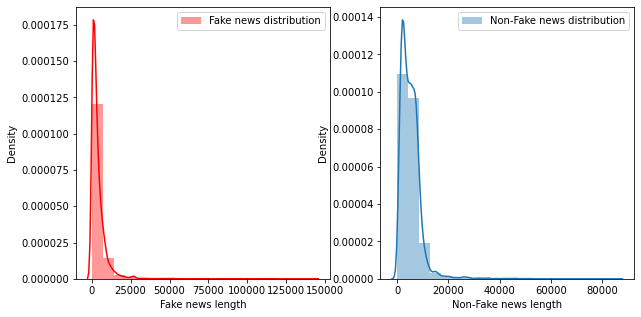

In [41]:
# News distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (10,5))

sns.distplot(df[df['label']==1]['length'],bins=20,ax=ax[0],label='Fake news distribution',color='r')

ax[0].set_xlabel('Fake news length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20,ax=ax[1],label='Non-Fake news distribution')
ax[1].set_xlabel('Non-Fake news length')
ax[1].legend()

plt.show()

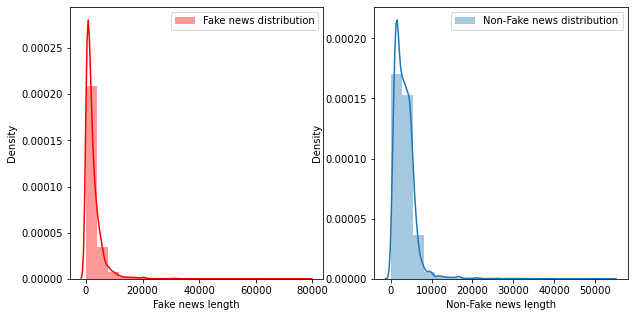

In [42]:
# News distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (10,5))

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='Fake news distribution',color='r')
ax[0].set_xlabel('Fake news length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='Non-Fake news distribution')
ax[1].set_xlabel('Non-Fake news length')
ax[1].legend()

plt.show()

## Word frequency without stop words in Fake news

In [29]:
from collections import Counter

In [35]:
def word_frequency(row):
    tokens = word_tokenize(row)
    counted = Counter(tokens)
    counted_2= Counter(ngrams(tokens,2))
    counted_3= Counter(ngrams(tokens,3))
    word_freq= pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False) 
    
    return word_freq ,word_pairs, trigrams

In [ ]:
for i in df['news'][df['label']==1]:
    print(word_frequency(i))

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\key\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

## Word frequency category wise

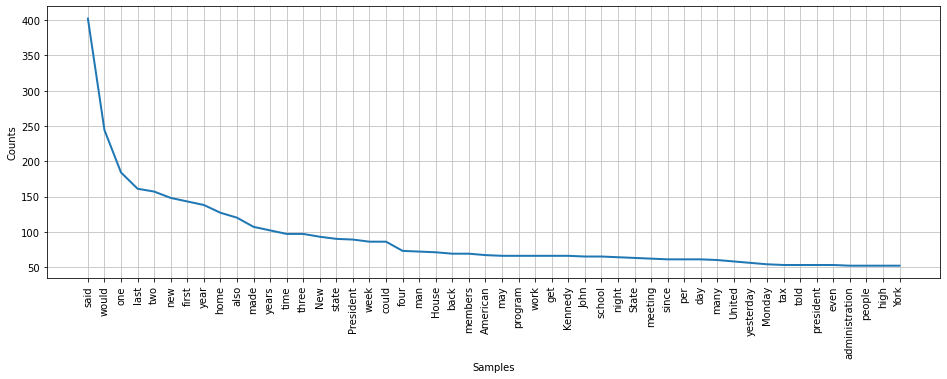

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
from nltk.corpus import brown
corpus_genre = 'news'
words = [word for word in brown.words(categories=corpus_genre) if word.lower() not in stop_words and word.isalpha() ]
freqdist = nltk.FreqDist(words)
plt.figure(figsize=(16,5))
freqdist.plot(50)

## Word frequency in Fake news Visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

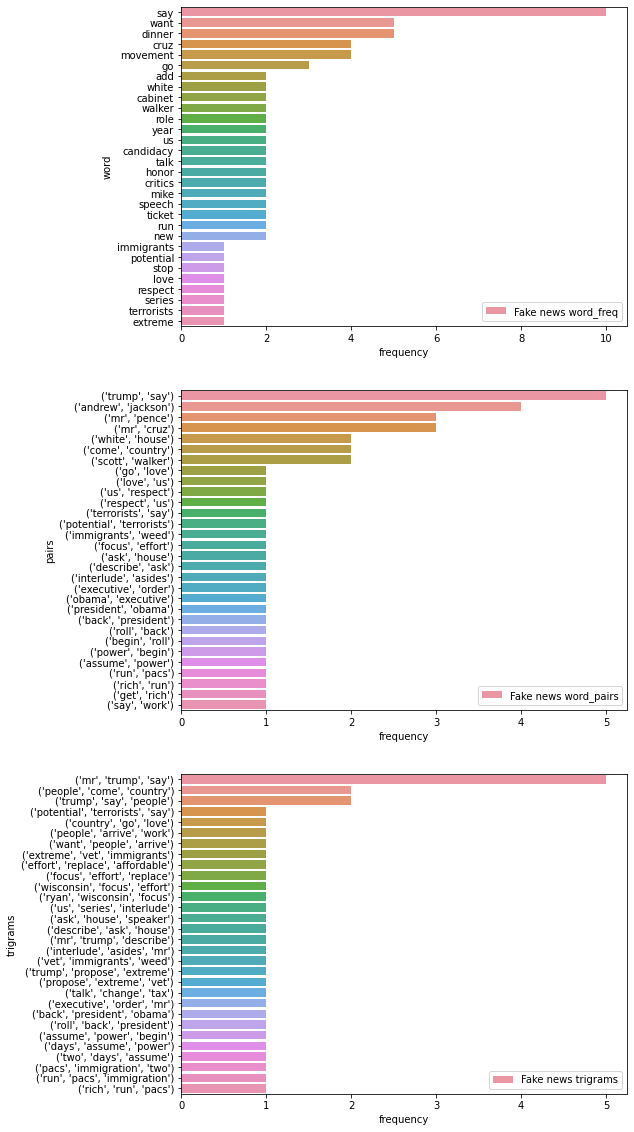

In [86]:
# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freq[df['label']==1].head(30),label='Fake news word_freq')
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=word_pairs[df['label']==1].head(30),label='Fake news word_pairs')
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=trigrams[df['label']==1].head(30),label='Fake news trigrams')
axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.show()

## Word frequency without stop words in Not-Fake news

In [ ]:
for i in df['news'][df['label']==0]:
    print(word_frequency(i))

## Word frequency in Not-Fake news Visualization

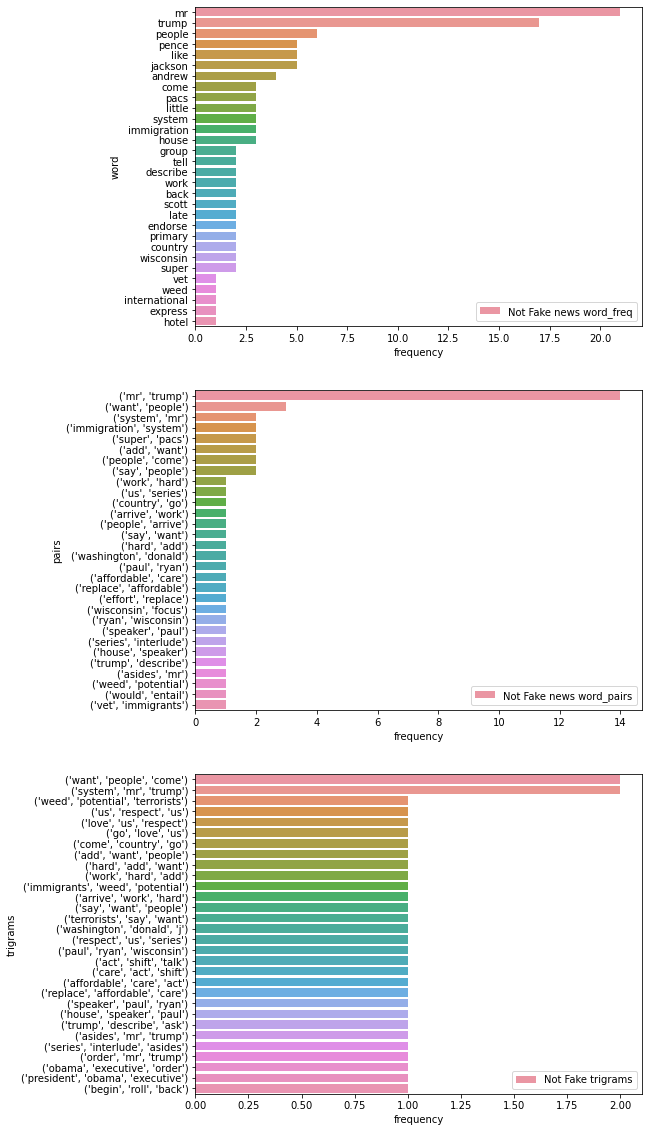

In [87]:
# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freq[df['label']==0].head(30),label='Not Fake news word_freq')
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=word_pairs[df['label']==0].head(30),label='Not Fake news word_pairs')
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=trigrams[df['label']==0].head(30).head(30),label='Not Fake trigrams')
axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.show()

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

## Word Cloud analysis of news text(Fake news)

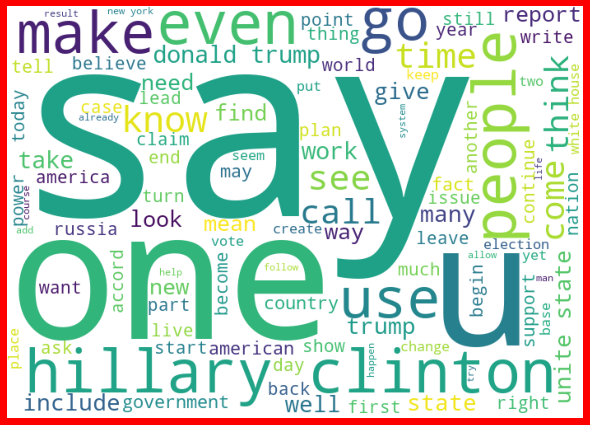

In [48]:
#Getting sense of loud words in Fake news
from wordcloud import WordCloud

fake = df['news'][df['label']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(fake))

plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

From above word cloud for news text of fake news we observe that Say,One,U are the most loud words

## Word Cloud analysis of news text(Not-Fake news)

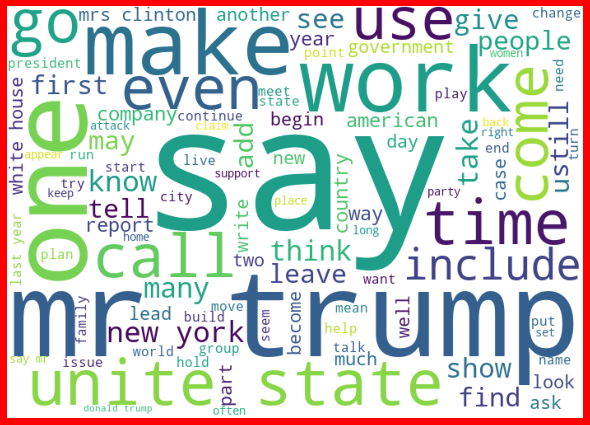

In [47]:
#Getting sense of loud words in Not Fake news
from wordcloud import WordCloud

not_fake = df['news'][df['label']==0]

not_fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(not_fake))

plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(not_fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

From above word cloud for news text of Not-fake news we observe that Say,Mr,Trump are the most loud words

## Word Cloud analysis of headline text(Fake news)¶

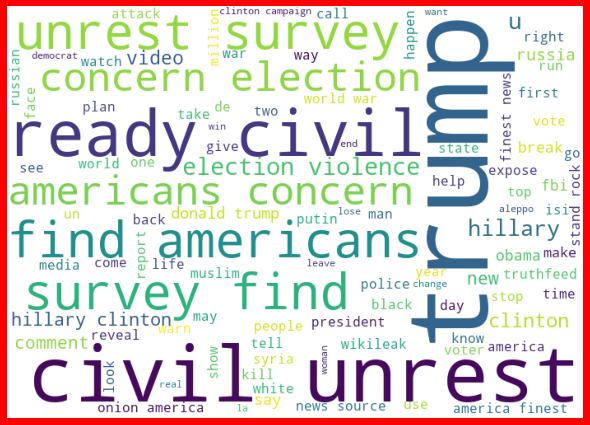

In [46]:
#Getting sense of loud words in Fake news
from wordcloud import WordCloud

fake = df['headline'][df['label']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(fake))

plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

From above word cloud for headline text of fake news we observe that Trump,Civil,Unrest are the most loud words

## Word Cloud analysis of headline text(Not-Fake news)

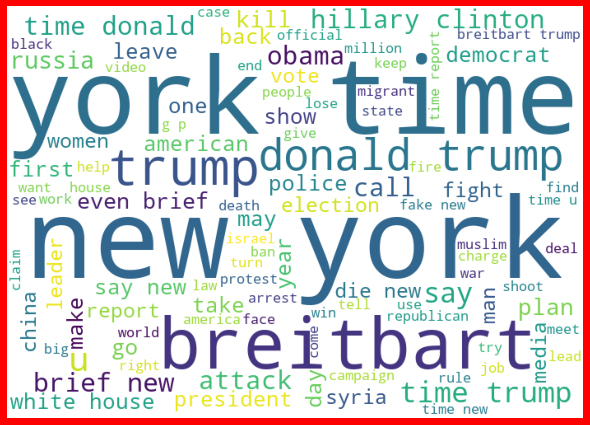

In [49]:
#Getting sense of loud words in Not-Fake news
from wordcloud import WordCloud

fake = df['headline'][df['label']==0]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(fake))

plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

From above word cloud for headline text of Not-fake news we observe that New,York,Time are the most loud words

## Vectorization (Feature Extraction) of Words using TfidfVectorizer

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vector = TfidfVectorizer(sublinear_tf=True,ngram_range=(1,2))
tf_vector.fit(df['news'])

TfidfVectorizer(ngram_range=(1, 2), sublinear_tf=True)

I used python ravel function to convert sparse matrix obtained by TfidfVectorizer into an array

In [44]:
x = tf_vector.transform(df['news'].ravel())
y = np.array(df['label'].ravel())

# Model(Classifier) training on train data and classifier performance evaluation on test data using multiple metrics

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True)

Here I used PassiveAggressiveClassifier because it is fast when we have large dataset and it is especially used in real time classification problems like twitter fake twits detection.

In [46]:
pac=PassiveAggressiveClassifier(max_iter=50)
model = LogisticRegression(solver='lbfgs')
clf=MultinomialNB()
rfc=RandomForestClassifier()
list=[pac,model,clf,rfc]
for m in list:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print('Accuracy of {} is {}'. format(m,round(score*100,2)))
    print(confusion_matrix(y_test,y_pred, labels=[0,1]))
    print(classification_report(y_test,y_pred))
    print('\n')

Accuracy of PassiveAggressiveClassifier(max_iter=50) is 97.25
[[2004   63]
 [  51 2035]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2067
           1       0.97      0.98      0.97      2086

    accuracy                           0.97      4153
   macro avg       0.97      0.97      0.97      4153
weighted avg       0.97      0.97      0.97      4153



Accuracy of LogisticRegression() is 95.35
[[1954  113]
 [  80 2006]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2067
           1       0.95      0.96      0.95      2086

    accuracy                           0.95      4153
   macro avg       0.95      0.95      0.95      4153
weighted avg       0.95      0.95      0.95      4153



Accuracy of MultinomialNB() is 81.8
[[2066    1]
 [ 755 1331]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2067
           1

From above metric results we find that PassiveAggressiveClassifier is giving best performance followed by LogisticRegression

## Cross validating accuracy scores using kfold cross validation

In [115]:
from sklearn import model_selection
seed=7
list=[pac,model,clf,rfc]
for m in list:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    results = model_selection.cross_val_score(m, x, y, cv=kfold)
    print('cross_val_score of',m,'is :')
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    print('\n')

cross_val_score of PassiveAggressiveClassifier(max_iter=50) is :
Accuracy: 97.418% (0.250%)


cross_val_score of LogisticRegression() is :
Accuracy: 95.227% (0.515%)


cross_val_score of MultinomialNB() is :
Accuracy: 82.718% (1.511%)


cross_val_score of RandomForestClassifier() is :
Accuracy: 89.702% (0.494%)




After cross validation now we are sure that there is no overfitting on train data

Saving PassiveAggressiveClassifier model using joblib for future prediction on test data

In [116]:
import joblib
joblib.dump(pac,'model.pkl')

['model.pkl']

In [117]:
model=joblib.load('model.pkl')

## ROC-AUC curves and Learning rate as an alternative evaluation method of Accuracy score

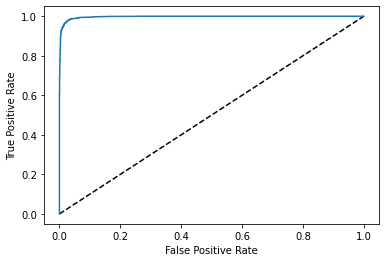

0.9756294300316107


In [119]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pac.fit(x_train,y_train)
predy=pac.predict(x_test)
y_train_pred = pac.decision_function(x_train)    
y_test_pred = pac.decision_function(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_test_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='PassiveAggressiveClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,predy)
print(auc_score)

In [48]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedShuffleSplit

In [29]:
sample_space = np.linspace(500, len(df) * 0.8, 10, dtype='int')

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=pac,
    X=x,
    y=y,
    train_sizes=sample_space,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=40),
    scoring='f1',
    n_jobs=-1
)

In [30]:
def make_tidy(sample_space, train_scores, valid_scores):
    messy_format = pd.DataFrame(
        np.stack((sample_space, train_scores.mean(axis=1),
                  valid_scores.mean(axis=1)), axis=1),
        columns=['# of training examples', 'Training set', 'Validation set']
    )
    
    return pd.melt(
        messy_format,
        id_vars='# of training examples',
        value_vars=['Training set', 'Validation set'],
        var_name='Scores',
        value_name='F1 score'
    )

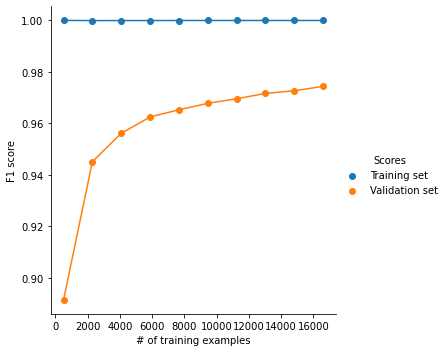

In [31]:
g = sns.FacetGrid(
    make_tidy(sample_space, train_scores, valid_scores), hue='Scores', size=5
)

g.map(plt.scatter, '# of training examples', 'F1 score')
g.map(plt.plot, '# of training examples', 'F1 score').add_legend();

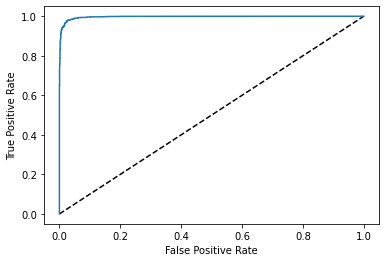

0.9753556790278184


In [121]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
model.fit(x_train,y_train)
predy2=model.predict(x_test)
y_train_pred2 = model.decision_function(x_train)    
y_test_pred2 = model.decision_function(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_test_pred2)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegressionClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,predy2)
print(auc_score)

From above results we observe that PassiveAggressiveClassifier is still better than LogisticRegressionClassifier but there is no significant difference in performance of both the models, infact the AUC score is same for both the classifiers.Also, from learning curve of our best classifier, we observe that the curve is perfact and there is no overfitting